In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#For confusion matrixes
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("voice.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Let's looking at top 5 datas.
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
#Let's looking at last 10 datas.
data.tail(10)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,...,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503,female
3159,0.168794,0.085842,0.188980,0.095558,0.240229,0.144671,1.462248,5.077956,0.956201,0.706861,...,0.168794,0.182863,0.020699,0.271186,0.988281,0.007812,5.882812,5.875000,0.268617,female
3160,0.151771,0.089147,0.185970,0.058159,0.230199,0.172040,1.227710,4.304354,0.962045,0.744590,...,0.151771,0.201600,0.023426,0.266667,0.766741,0.007812,4.007812,4.000000,0.192220,female
3161,0.170656,0.081237,0.184277,0.113012,0.239096,0.126084,1.378256,5.431663,0.950750,0.658558,...,0.170656,0.198475,0.160000,0.253968,0.414062,0.007812,0.734375,0.726562,0.336918,female
3162,0.146023,0.092525,0.183434,0.041747,0.224337,0.182590,1.384981,5.118927,0.948999,0.659825,...,0.146023,0.195640,0.039506,0.275862,0.533854,0.007812,2.992188,2.984375,0.258924,female
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [6]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [8]:
# Firstly, we must check our data. If we have NaN values, we should drop them.
data.info()
#As we can see easily, we have no NaN values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Our 'label' feature has 2 valuable: male and female. These are string but we need integers for classification. Therefore, we must convert them from object to integer.

In [9]:
data.label = [1 if each == "female" else 0 for each in data.label]
#We assign 1 to female, 0 to male.

Let's check it!

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

## Confusion Matrix

Before start the classifications, we should know one thing: Confusion Matrix! For example; we have 100 data point (dogs and cats) and we make a prediction. Our prediction score is 0.8 so we predict well %80. Confusion matrix gives us;

- How many true values we predict true (TP = True Positive)
- How many true values we predict false (FP = False Positive)
- How many false values we predict false (TN = True Negative)
- How many false values we predict true (FN = False Negative 

As you can see; our label features converted integer!

In [11]:
#We should have x and y values for test-train datas.
y = data.label.values
x_data = data.drop(["label"],axis=1)

In [12]:
#Normalization
x = (x_data - np.min(x_data)) / (np.max(x_data)).values

After assign x and y value; we should train and test datas split.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
#test_size=0.2 means %20 test datas, %80 train datas
method_names = []
method_scores = []
#These are for barplot in conclusion

And now time to classification our data!

We start with:

### LOGISTIC REGRESSION CLASSIFICATION 

Logistic Regression Classification Test Accuracy 0.9810725552050473


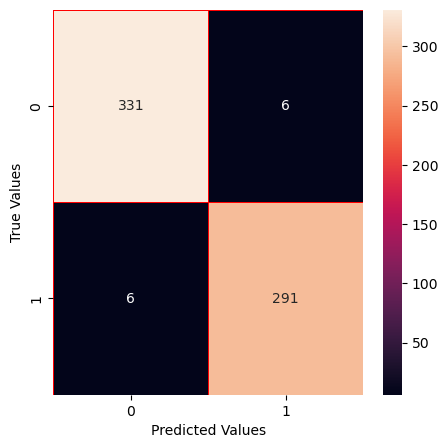

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### KNN (K-Nearest Neighbour) CLASSIFICATION



Score for Number of Neighbors = 3: 0.9779179810725552


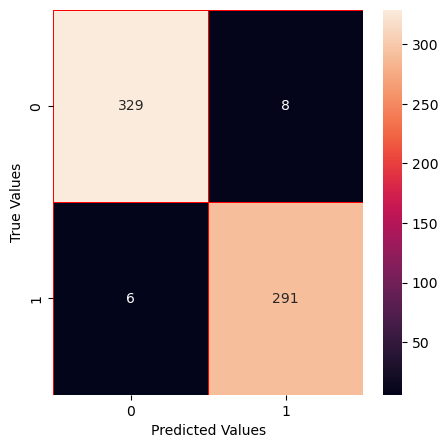

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 3: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

n_neighbors is an optional parameter. I wrote it 3 but you can write anything. Let's learn the best value of n_neighbors parameter.

Text(0, 0.5, 'score')

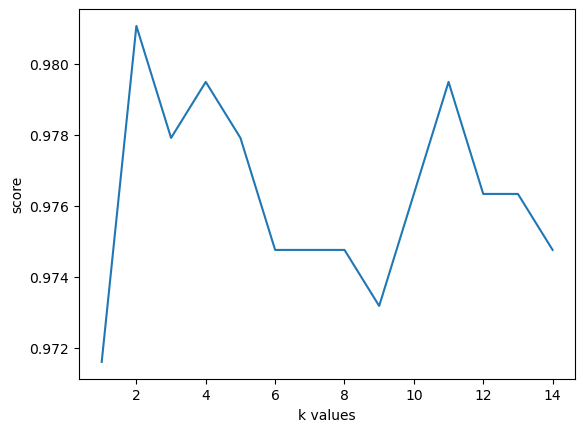

In [16]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

As we can see; the best value of n_neighbor is 2. Let's find score when n_neighbors=2



Score for Number of Neighbors = 2: 0.9810725552050473


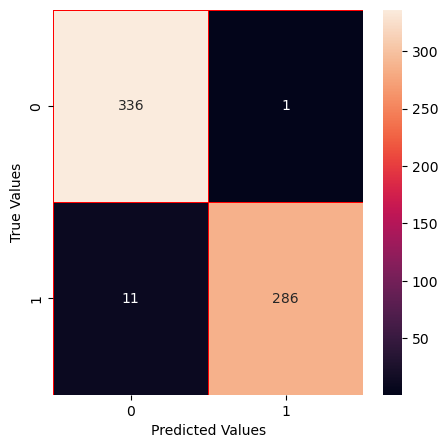

In [17]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 2: {}".format(knn.score(x_test,y_test)))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

SUPPORT VECTOR MACHINE (SVM)

SVM Classification Score is: 0.9842271293375394


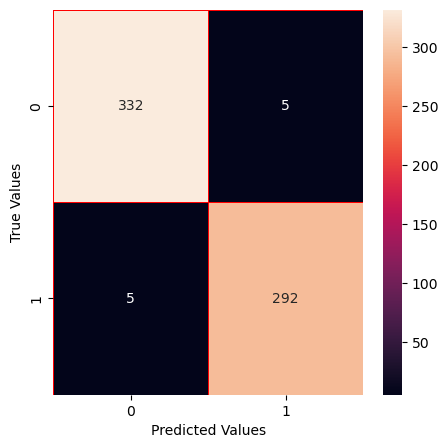

In [18]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### NAIVE BAYES CLASSIFICATION

 

Naive Bayes Classification Score: 0.8785488958990536


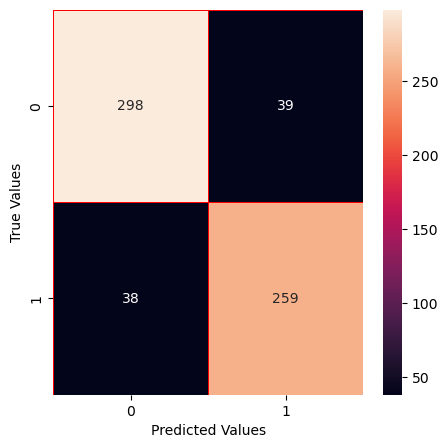

In [19]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### DECISION TREE CLASSIFICATION



Decision Tree Classification Score:  0.9668769716088328


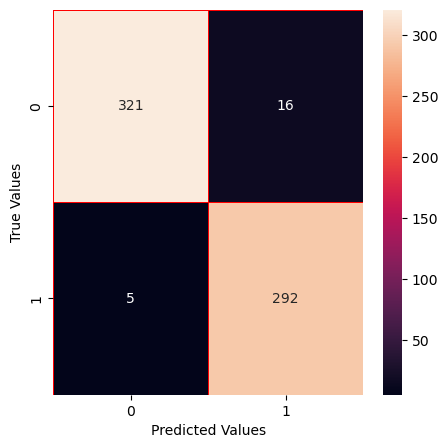

In [20]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### RANDOM FOREST CLASSIFICATION

Random Forest Classification Score:  0.9842271293375394


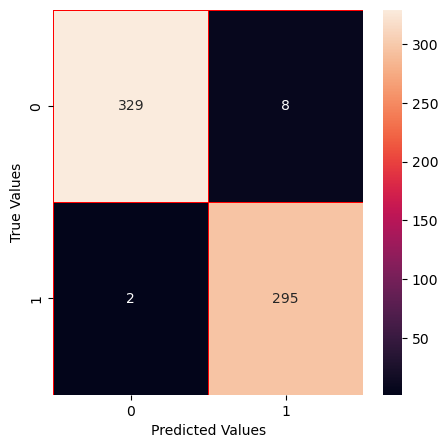

In [21]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(x_test,y_test))

#Confusion Matrix
y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

CONCLUSION

We completed seven different classification on this data and we see; Random Forest Classification is the best way to make classification on this dataset. Of course not everytime but for this practice Random Forest gave us the best classifications!

Let's see differences between our methods scores!

Text(0, 0.5, 'Method Score')

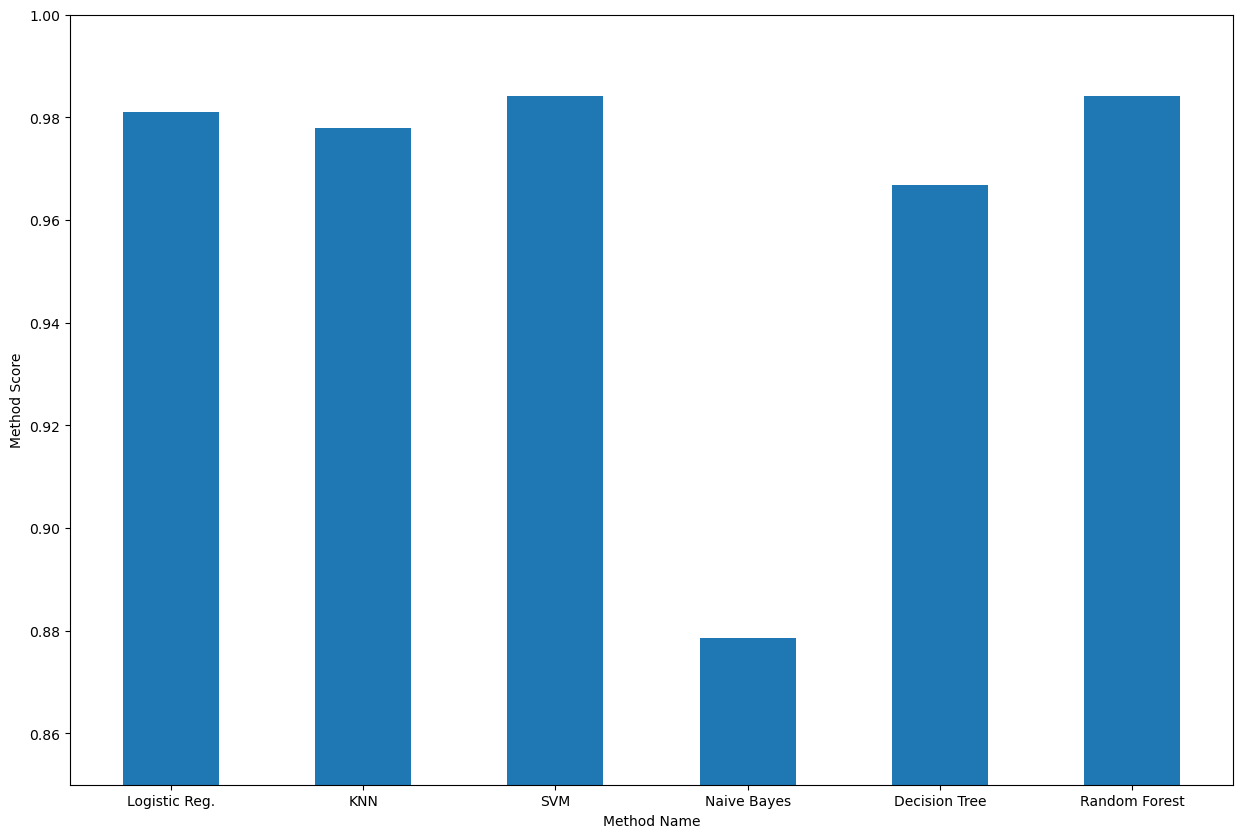

In [22]:
plt.figure(figsize=(15,10))
plt.ylim([0.85,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')